# NYC 311 API

You've gotten a chance to explore API basics through the Yelp API. In preparation for your final project, we will investigate another API from scratch. This should provide you with another familiar dataq option as well as practice for applying the same process to new unfamiliar APIs.

To start, go over to the API documentation at: 

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv


<img src="311_api_docs.png">

## Make an initial API call to retrieve 311 complaints from a neighborhood or zip code of your choice.

In [ ]:
# Your code here

In [16]:
# Formulation 1



#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '11204', limit=2000)

In [17]:
# Formulation 2
import requests
import pandas as pd

zip_code = '11204'

# can't figure out date ranges at the moment...
start_date = '2018-01-01T12:00:00'
end_date = '2018-02-01T12:00:00'

# create pull request based on parameters
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?incident_zip={}".format(zip_code)

# do the pull
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
    print('Hit an error.')

## Briefly Explore the Structure of the Response You Received.

In [23]:
#Formulation 1
type(results)

list

In [24]:
len(results)

2000

In [25]:
results[0]

{'address_type': 'ADDRESS',
 'agency': 'NYPD',
 'agency_name': 'New York City Police Department',
 'bbl': '3061590036',
 'borough': 'BROOKLYN',
 'city': 'BROOKLYN',
 'closed_date': '2018-10-28T12:16:45.000',
 'community_board': '11 BROOKLYN',
 'complaint_type': 'Blocked Driveway',
 'created_date': '2018-10-28T11:21:12.000',
 'cross_street_1': '16 AVENUE',
 'cross_street_2': '17 AVENUE',
 'descriptor': 'Partial Access',
 'due_date': '2018-10-28T19:21:12.000',
 'facility_type': 'Precinct',
 'incident_address': '1674 69 STREET',
 'incident_zip': '11204',
 'latitude': '40.6187013953729',
 'location': {'type': 'Point',
  'coordinates': [-73.995627099806, 40.618701395373]},
 'location_type': 'Street/Sidewalk',
 'longitude': '-73.9956270998064',
 'open_data_channel_type': 'PHONE',
 'park_borough': 'BROOKLYN',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2018-10-28T12:16:45.000',
 'resolution_description': 'The Police Department responded and upon arrival those res

In [18]:
# Formulation 2
print(type(data))

<class 'list'>


In [19]:
len(data)

1000

In [20]:
data[0]

{'address_type': 'ADDRESS',
 'agency': 'DSNY',
 'agency_name': 'Department of Sanitation',
 'bbl': '3054640061',
 'borough': 'BROOKLYN',
 'city': 'BROOKLYN',
 'community_board': '12 BROOKLYN',
 'complaint_type': 'Request Large Bulky Item Collection',
 'created_date': '2018-10-28T17:21:00.000',
 'cross_street_1': '20 AVENUE',
 'cross_street_2': '51 STREET',
 'descriptor': 'Request Large Bulky Item Collection',
 'facility_type': 'N/A',
 'incident_address': '961 DAHILL ROAD',
 'incident_zip': '11204',
 'latitude': '40.62436991521529',
 'location': {'type': 'Point',
  'coordinates': [-73.976991692011, 40.624369915215]},
 'location_type': 'Sidewalk',
 'longitude': '-73.97699169201135',
 'open_data_channel_type': 'PHONE',
 'park_borough': 'BROOKLYN',
 'park_facility_name': 'Unspecified',
 'resolution_action_updated_date': '2018-10-30T00:00:00.000',
 'resolution_description': 'The Department of Sanitation has sent this complaint to the appropriate district garage or bureau for further action.

## Create a Pandas DataFrame of the Data From the Response

In [26]:
# Formulation 1 
df = pd.DataFrame(results)

print(len(df))
print(df.columns)
df.head()

2000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_company_borough', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,taxi_company_borough,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,3061590036,BROOKLYN,BROOKLYN,2018-10-28T12:16:45.000,11 BROOKLYN,Blocked Driveway,2018-10-28T11:21:12.000,...,BROOKLYN,Unspecified,2018-10-28T12:16:45.000,The Police Department responded and upon arriv...,Closed,69 STREET,NaN,40685123,985464,164686
1,ADDRESS,NYPD,New York City Police Department,3066020060,BROOKLYN,BROOKLYN,2018-10-28T20:18:46.000,11 BROOKLYN,Blocked Driveway,2018-10-28T18:24:46.000,...,BROOKLYN,Unspecified,2018-10-28T20:18:46.000,The Police Department responded and upon arriv...,Closed,WEST 5 STREET,NaN,40685099,990124,161156
2,ADDRESS,NYPD,New York City Police Department,3055130072,BROOKLYN,BROOKLYN,2018-10-29T00:27:09.000,12 BROOKLYN,Noise - Residential,2018-10-28T22:43:32.000,...,BROOKLYN,Unspecified,2018-10-29T00:27:09.000,The Police Department responded to the complai...,Closed,60 STREET,NaN,40685075,988536,165307
3,ADDRESS,DEP,Department of Environmental Protection,3062260028,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,Water System,2018-10-28T14:45:00.000,...,BROOKLYN,Unspecified,NaN,NaN,Open,BAY RIDGE PARKWAY,NaN,40684921,985084,162969
4,ADDRESS,NYPD,New York City Police Department,NaN,BROOKLYN,BROOKLYN,2018-10-29T00:17:02.000,11 BROOKLYN,Illegal Parking,2018-10-28T22:16:51.000,...,BROOKLYN,Unspecified,2018-10-29T00:17:02.000,The Police Department issued a summons in resp...,Closed,71 STREET,NaN,40684027,987988,162028


In [27]:
# Formulation 2 
df = pd.DataFrame(data)

print(len(df))
print(df.columns)
df.head()

1000
Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_company_borough', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')


,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,taxi_company_borough,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,DSNY,Department of Sanitation,3054640061,BROOKLYN,BROOKLYN,NaN,12 BROOKLYN,Request Large Bulky Item Collection,2018-10-28T17:21:00.000,...,BROOKLYN,Unspecified,2018-10-30T00:00:00.000,The Department of Sanitation has sent this com...,Assigned,DAHILL ROAD,NaN,40682665,990637,166752
1,ADDRESS,DEP,Department of Environmental Protection,3055620009,BROOKLYN,BROOKLYN,NaN,11 BROOKLYN,Water System,2018-10-28T15:53:00.000,...,BROOKLYN,Unspecified,NaN,NaN,Open,19 AVENUE,NaN,40682760,987367,164122
2,ADDRESS,DEP,Department of Environmental Protection,3055620009,BROOKLYN,BROOKLYN,2018-10-28T15:05:00.000,11 BROOKLYN,Water System,2018-10-28T15:03:00.000,...,BROOKLYN,Unspecified,2018-10-28T15:05:00.000,The Department of Environmental Protection det...,Closed,19 AVENUE,NaN,40682831,987367,164122
3,ADDRESS,DSNY,Department of Sanitation,3054370009,BROOKLYN,BROOKLYN,NaN,12 BROOKLYN,Request Large Bulky Item Collection,2018-10-28T15:14:00.000,...,BROOKLYN,Unspecified,2018-10-31T00:00:00.000,The Department of Sanitation has sent this com...,Assigned,16 AVENUE,NaN,40682579,988735,169761
4,ADDRESS,NYPD,New York City Police Department,3055007501,BROOKLYN,BROOKLYN,2018-10-29T00:41:22.000,12 BROOKLYN,Illegal Parking,2018-10-28T21:38:32.000,...,BROOKLYN,Unspecified,2018-10-29T00:41:22.000,The Police Department issued a summons in resp...,Closed,58 STREET,NaN,40682564,989756,165018


## Create a Histogram of the Complaint Types From Your Dataset

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

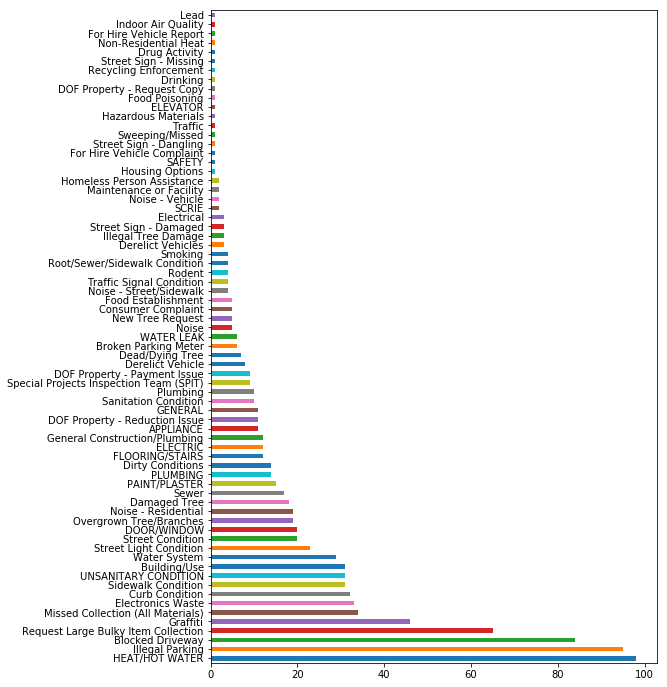

In [36]:
# Your code here 
df.complaint_type.value_counts().plot(kind='barh', figsize=(8,12))